In [14]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
N , D , H = 64, 1000, 100

x = tf.placeholder(tf.float64 , shape=(N , D))
y = tf.placeholder(tf.float64 , shape=(N , D))
w1 = tf.placeholder(tf.float64 , shape=(D , H))
w2 = tf.placeholder(tf.float64 , shape=(H , D))

h = tf.maximum(tf.matmul(x,w1), 0)
yPred = tf.matmul(h,w2)

diff =yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2 , axis=1))

gradW1 , gradW2 = tf.gradients(loss , [w1,w2])


In [16]:
with tf.Session() as sess:
    values = {x:np.random.randn(N,D),
              w1:np.random.randn(D,H),
              w2:np.random.randn(H,D),
              y:np.random.randn(N,D)}
    
    out = sess.run([loss, gradW1, gradW2], feed_dict=values)
    
    lossVal, gradW1Val, gradW2Val = out
    

In [ ]:
'''
weights as place holders

'''

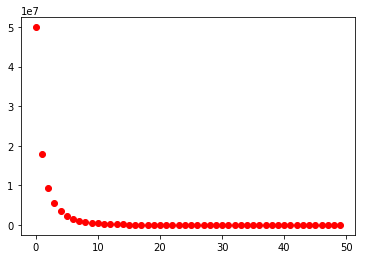

996.288475556587


In [17]:
with tf.Session() as sess:
    values = {x:np.random.randn(N,D),
              w1:np.random.randn(D,H),
              w2:np.random.randn(H,D),
              y:np.random.randn(N,D)}
    
    learningRate = 1e-5
    steps = 50
    losses = []
    
    for i in range(steps):
    
        out = sess.run([loss, gradW1, gradW2], feed_dict=values)
        lossVal, gradW1Val, gradW2Val = out
        
        values[w1] -= learningRate * gradW1Val
        values[w2] -= learningRate * gradW2Val
        losses.append(lossVal)
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    
    print(lossVal)

In [ ]:
'''

weights as variables without adding updates implementaion to the session

'''

In [22]:
N , D , H = 64, 1000, 100

x = tf.placeholder(tf.float32 , shape=(N , D))
y = tf.placeholder(tf.float32 , shape=(N , D))
w1 = tf.Variable(tf.random_normal((D,H)))
w2 = tf.Variable(tf.random_normal((H,D)))

h = tf.maximum(tf.matmul(x,w1), 0)
yPred = tf.matmul(h,w2)

diff =yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2 , axis=1))

gradW1 , gradW2 = tf.gradients(loss , [w1,w2])

learningRate = 1e-5

newW1 = w1.assign(w1 - learningRate *gradW1)
newW2 = w2.assign(w2 - learningRate *gradW2)


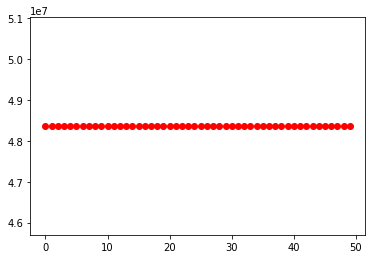

[48360976.0]


In [31]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D),
              y:np.random.randn(N,D)}
    
    steps = 50
    losses = []
    
    for i in range(steps):
    
        lossVal  = sess.run([loss], feed_dict=values)
        losses.append(lossVal)
        
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    
    print(lossVal)

In [ ]:
'''

weights as variables with adding updates implementaion to the session

'''

In [29]:
N , D , H = 64, 1000, 100

x = tf.placeholder(tf.float32 , shape=(N , D))
y = tf.placeholder(tf.float32 , shape=(N , D))
w1 = tf.Variable(tf.random_normal((D,H)))
w2 = tf.Variable(tf.random_normal((H,D)))

h = tf.maximum(tf.matmul(x,w1), 0)
yPred = tf.matmul(h,w2)

diff =yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2 , axis=1))

gradW1 , gradW2 = tf.gradients(loss , [w1,w2])

learningRate = 1e-5

newW1 = w1.assign(w1 - learningRate *gradW1)
newW2 = w2.assign(w2 - learningRate *gradW2)

updates = tf.group(newW1,newW2)

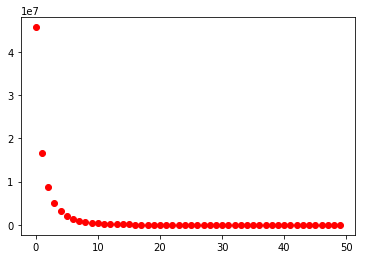

1061.9106


In [32]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D),
              y:np.random.randn(N,D)}
    
    steps = 50
    losses = []
    
    for i in range(steps):
    
        lossVal, _  = sess.run([loss, updates], feed_dict=values)
        losses.append(lossVal)
        
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    
    print(lossVal)

In [ ]:
'''
using tensorflow optmizer

'''

In [35]:
N , D , H = 64, 1000, 100

x = tf.placeholder(tf.float32 , shape=(N , D))
y = tf.placeholder(tf.float32 , shape=(N , D))
w1 = tf.Variable(tf.random_normal((D,H)))
w2 = tf.Variable(tf.random_normal((H,D)))

h = tf.maximum(tf.matmul(x,w1), 0)
yPred = tf.matmul(h,w2)

diff =yPred - y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2 , axis=1))

learningRate = 1e-5

optmizer = tf.train.GradientDescentOptimizer(learningRate)
updates = optmizer.minimize(loss)


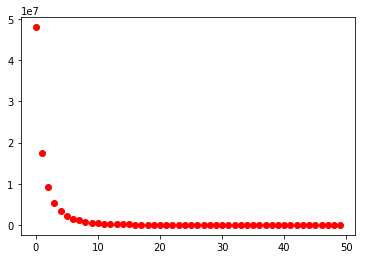

1012.23645


In [36]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D),
              y:np.random.randn(N,D)}
    
    steps = 50
    losses = []
    
    for i in range(steps):
    
        lossVal, _  = sess.run([loss, updates], feed_dict=values)
        losses.append(lossVal)
        
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    
    print(lossVal)

In [ ]:
'''

using tensorflow loss 

'''

In [37]:
N , D , H = 64, 1000, 100

x = tf.placeholder(tf.float32 , shape=(N , D))
y = tf.placeholder(tf.float32 , shape=(N , D))
w1 = tf.Variable(tf.random_normal((D,H)))
w2 = tf.Variable(tf.random_normal((H,D)))

h = tf.maximum(tf.matmul(x,w1), 0)
yPred = tf.matmul(h,w2)

loss = tf.losses.mean_squared_error(yPred,y)

learningRate = 1e-5

optmizer = tf.train.GradientDescentOptimizer(learningRate)
updates = optmizer.minimize(loss)

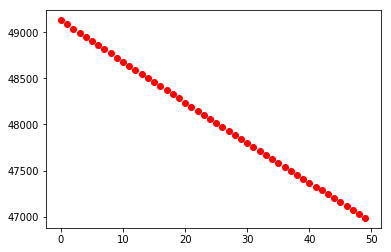

46987.816


In [38]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D),
              y:np.random.randn(N,D)}
    
    steps = 50
    losses = []
    
    for i in range(steps):
    
        lossVal, _  = sess.run([loss, updates], feed_dict=values)
        losses.append(lossVal)
        
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    
    print(lossVal)

In [ ]:
'''
using tensorflow layers

'''

In [47]:
N , D , H = 64, 1000, 100

x = tf.placeholder(tf.float32 , shape=(N , D))
y = tf.placeholder(tf.float32 , shape=(N , D))

init = tf.variance_scaling_initializer(2.0)

h = tf.layers.dense(inputs=x, units=H, activation=tf.nn.relu, kernel_initializer=init)
yPred = tf.layers.dense(inputs=h, units=D, kernel_initializer=init)

loss = tf.losses.mean_squared_error(yPred,y)

#diff =yPred - y
#loss = tf.reduce_mean(tf.reduce_sum(diff ** 2 , axis=1))


learningRate = 1e-5

optmizer = tf.train.GradientDescentOptimizer(learningRate)
updates = optmizer.minimize(loss)

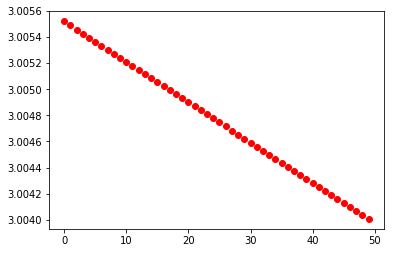

3.0040064


In [48]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D),
              y:np.random.randn(N,D)}
    
    steps = 50
    losses = []
    
    for i in range(steps):
    
        lossVal, _  = sess.run([loss, updates], feed_dict=values)
        losses.append(lossVal)
        
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    
    print(lossVal)

In [ ]:
'''

involving some of keras 

'''

In [67]:
N , D , H = 64, 1000, 100

x = tf.placeholder(tf.float32 , shape=(N , D))
y = tf.placeholder(tf.float32 , shape=(N , D))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(H, input_shape = (D,), activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(D))

yPred = model(x)

loss = tf.losses.mean_squared_error(yPred, y)

optmizer = tf.train.GradientDescentOptimizer(1e0)
updates = optmizer.minimize(loss)



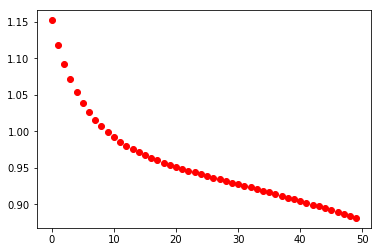

0.88149285


In [68]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    values = {x:np.random.randn(N,D),
              y:np.random.randn(N,D)}
    
    steps = 50
    losses = []
    
    for i in range(steps):
    
        lossVal, _  = sess.run([loss, updates], feed_dict=values)
        losses.append(lossVal)
        
        
    
    plt.plot(range(steps), losses, 'ro', label='lossVal')
    plt.show()
    
    print(lossVal)

In [ ]:
'''
using just keras

'''

In [71]:
N , D , H = 64, 1000, 100

model.add(tf.keras.layers.Dense(H, input_shape = (D,), activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(D))

model.compile(loss = tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.SGD(lr=1e0))

x = np.random.randn(N, D)
y = np.random.randn(N, D)

history = model.fit(x, y, epochs=50, batch_size=N)


Epoch 1/50
64/64 [==============================] - 1s 14ms/step - loss: 0.9904
Epoch 2/50
64/64 [==============================] - 0s 719us/step - loss: 0.9898
Epoch 3/50
64/64 [==============================] - 0s 547us/step - loss: 0.9893
Epoch 4/50
64/64 [==============================] - 0s 906us/step - loss: 0.9889
Epoch 5/50
64/64 [==============================] - 0s 469us/step - loss: 0.9886
Epoch 6/50
64/64 [==============================] - 0s 672us/step - loss: 0.9883
Epoch 7/50
64/64 [==============================] - 0s 391us/step - loss: 0.9880
Epoch 8/50
64/64 [==============================] - 0s 703us/step - loss: 0.9878
Epoch 9/50
64/64 [==============================] - 0s 406us/step - loss: 0.9875
Epoch 10/50
64/64 [==============================] - 0s 547us/step - loss: 0.9873
Epoch 11/50
64/64 [==============================] - 0s 500us/step - loss: 0.9871
Epoch 12/50
64/64 [==============================] - 0s 672us/step - loss: 0.9868
Epoch 13/50
64/64 [=======